### My Experimentations to Parse `Categories` and `Title` fields

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the cvs file
data = pd.read_csv("../data/SGJobData_1000.csv")
df = pd.DataFrame(data)

In [3]:
#columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   categories                          1000 non-null   object 
 1   employmentTypes                     1000 non-null   object 
 2   metadata_expiryDate                 1000 non-null   object 
 3   metadata_isPostedOnBehalf           1000 non-null   bool   
 4   metadata_jobPostId                  1000 non-null   object 
 5   metadata_newPostingDate             1000 non-null   object 
 6   metadata_originalPostingDate        1000 non-null   object 
 7   metadata_repostCount                1000 non-null   int64  
 8   metadata_totalNumberJobApplication  1000 non-null   int64  
 9   metadata_totalNumberOfView          1000 non-null   int64  
 10  minimumYearsExperience              1000 non-null   int64  
 11  numberOfVacancies                   1000 non

In [4]:
#shape of the dataframe
df.shape

(1000, 21)

In [5]:
df.head()

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,8/5/2023,False,MCF-2023-0252866,8/4/2023,30/3/2023,2,5,151,...,1,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273977,8/4/2023,8/4/2023,0,0,55,...,2,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up..."
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,22/4/2023,False,MCF-2023-0273994,8/4/2023,8/4/2023,0,7,99,...,1,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273991,8/4/2023,8/4/2023,0,6,113,...,1,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S..."
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,8/5/2023,False,MCF-2023-0273976,8/4/2023,8/4/2023,0,3,99,...,3,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator


### Parse Industry from `Categories` column

In [13]:
list (df["categories"])

['[{"id":13,"category":"Environment / Health"},{"id":25,"category":"Manufacturing"},{"id":36,"category":"Sciences / Laboratory / R&D"}]',
 '[{"id":21,"category":"Information Technology"}]',
 '[{"id":33,"category":"Repair and Maintenance"}]',
 '[{"id":21,"category":"Information Technology"}]',
 '[{"id":2,"category":"Admin / Secretarial"}]',
 '[{"id":7,"category":"Consulting"},{"id":21,"category":"Information Technology"},{"id":29,"category":"Professional Services"}]',
 '[{"id":21,"category":"Information Technology"}]',
 '[{"id":37,"category":"Security and Investigation"}]',
 '[{"id":1,"category":"Accounting / Auditing / Taxation"},{"id":24,"category":"Logistics / Supply Chain"},{"id":35,"category":"Sales / Retail"}]',
 '[{"id":7,"category":"Consulting"},{"id":14,"category":"Events / Promotions"},{"id":24,"category":"Logistics / Supply Chain"},{"id":29,"category":"Professional Services"},{"id":35,"category":"Sales / Retail"}]',
 '[{"id":11,"category":"Engineering"},{"id":21,"category":"I

### Parse `categories` into separate values
The cell below converts the `categories` column into a list of cleaned category strings, explodes them into separate rows, and shows top categories.

Total distinct parsed categories: 105

Top 20 categories:
{Id:11                                 145
Category:Engineering}                  145
Category:Information Technology}       142
{Id:21                                 142
Secretarial}                           138
Category:Admin                         138
{Id:2                                  138
Category:Customer Service}             125
{Id:8                                  125
{Id:35                                 119
Category:Sales                         119
Retail}                                119
Taxation}                               84
Category:Accounting                     84
{Id:1                                   84
Auditing                                84
{Id:15                                  82
Category:F&B}                           82
{Id:6                                   77
Category:Building And Construction}     77
Name: categories_list, dtype: int64

Sample exploded rows:
                       

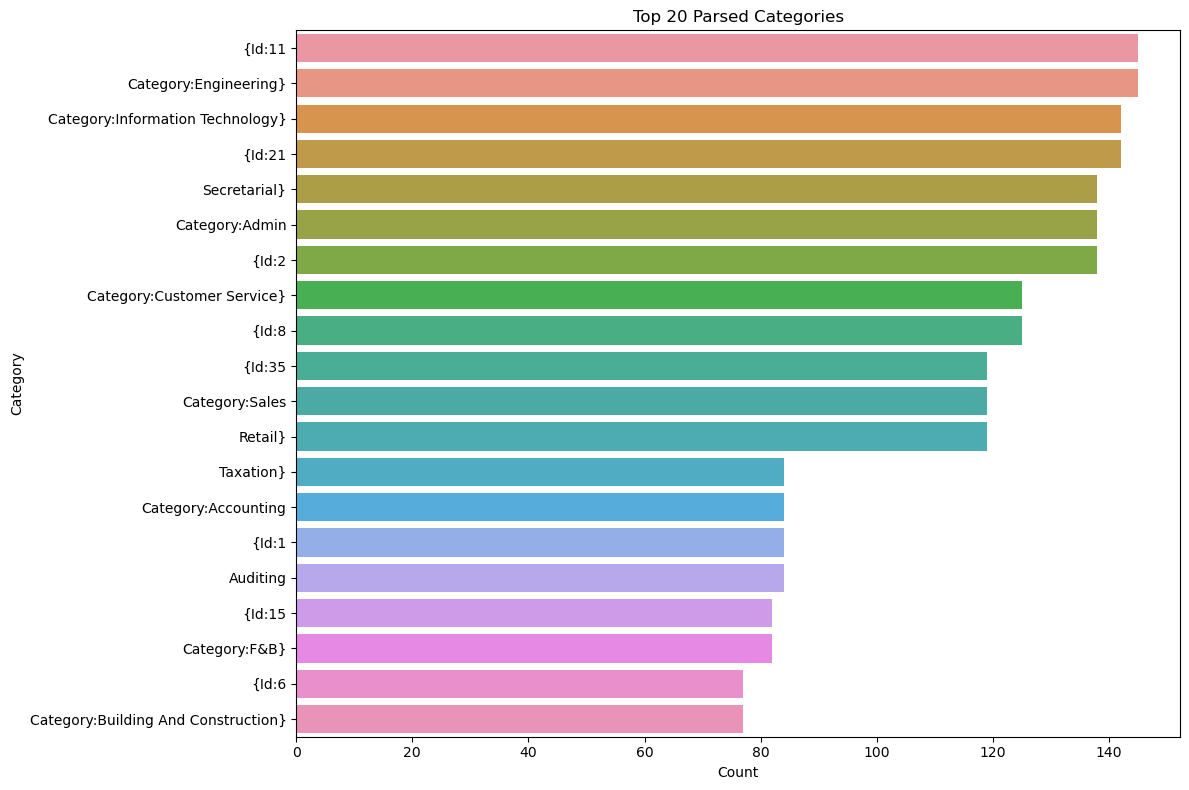

In [14]:
# Parse categories into a list and explode into rows
import re

# Robust splitter that handles common separators and removes brackets/quotes
def split_categories(cell):
    if pd.isna(cell):
        return []
    s = str(cell)
    # remove surrounding brackets and quotes
    s = re.sub(r"[\[\]\(\)\"']", "", s)
    # replace common separators with a single separator
    parts = re.split(r"\s*(?:,|;|/|\||\\|\\n)\s*", s)
    # strip and remove empties
    parts = [p.strip() for p in parts if p and p.strip()]
    return parts

# Create a new column with the parsed list
df['categories_list'] = df['categories'].apply(split_categories)

# Explode to get one category per row
df_categories = df.explode('categories_list').copy()
# Normalize (title case) and handle missing
df_categories['categories_list'] = df_categories['categories_list'].fillna('').str.strip()
# Optionally standardize capitalization
df_categories['categories_list'] = df_categories['categories_list'].replace('', pd.NA)

df_categories['categories_list'] = df_categories['categories_list'].dropna().str.title()

# Compute counts
cat_counts = df_categories['categories_list'].value_counts()
print('Total distinct parsed categories:', cat_counts.shape[0])
print('\nTop 20 categories:')
print(cat_counts.head(20))

# Show a small sample of exploded df
print('\nSample exploded rows:')
print(df_categories[['categories', 'categories_list']].drop_duplicates().head(20))

# Plot top 20 categories
plt.figure(figsize=(12,8))
sns.barplot(x=cat_counts.head(20).values, y=cat_counts.head(20).index)
plt.title('Top 20 Parsed Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [9]:
list(df["title"])


['Food Technologist - Clementi | Entry Level | Up to $2,800',
 'Software Engineer (Fab Support) (Java, CIM, Up to $ 5.5K) - DS',
 'Senior Technician',
 'Senior .NET Developer (.NET Core, MVC, MVVC, SharePoint) - DS',
 'Sales / Admin Cordinator',
 'Software Support Engineer',
 'Urgent Hiring!!! Business Development Manager (Process Automation Solution, MES, Pre-sales, Siemens, Aveva)',
 'IT Security Engineer (Maritime/ Cloud Security)',
 'Assistant Sales Manager (Hunter Role)- Up to $5,500| Freight Forwarding| Changi',
 'Car Leasing, RM – West|Entry Level | Up to Basic $2,500 + $1,000 Transport + Comm',
 'Electrical Engineer - Tuas | Generator exp|$4,700',
 'Cook / Chef de Partie / Kitchen Assistant',
 'Senior Accounts & Admin- Harbourfront | Construction Industry |$4500',
 'Tech Lead (Backend, Ruby on Rails, AWS, Socket IO, Up to $9K)',
 'Sales Specialist/Manager, Molecular Diagnostics',
 'Senior  Cloud Migration Engineer',
 'Lead Cloud Migration Engineer',
 'Cloud Migration Engineer',

In [12]:
# Define common technical skills and keywords
technical_skills = [
    'python', 'java', 'javascript', 'js', 'react', 'angular', 'vue', 
    'node', 'sql', 'mysql', 'postgresql', 'mongodb', 'nosql',
    'aws', 'azure', 'cloud', 'docker', 'kubernetes', 'k8s',
    'html', 'css', 'php', 'c++', 'c#', '.net', 'ruby', 'rails',
    'spring', 'hibernate', 'rest', 'api', 'microservices',
    'git', 'linux', 'unix', 'agile', 'scrum', 'devops',
    'ml', 'ai', 'machine learning', 'data science',
    'fullstack', 'frontend', 'backend', 'full stack', 'front end', 'back end'
]

# Function to extract skills from job titles
def extract_skills(title):
    # Convert title to lowercase for better matching
    title = title.lower()
    
    # Find all matching skills
    found_skills = [skill for skill in technical_skills if skill in title]
    
    return found_skills

# Apply the function to the title column
df['extracted_skills'] = df['title'].apply(extract_skills)

# Display titles with extracted skills
for title, skills in zip(df['title'], df['extracted_skills']):
    if skills:  # Only show titles with found skills
        print(f"\nTitle: {title}")
        print(f"Skills: {', '.join(skills)}")


Title: Software Engineer (Fab Support) (Java, CIM, Up to $ 5.5K) - DS
Skills: java

Title: Senior .NET Developer (.NET Core, MVC, MVVC, SharePoint) - DS
Skills: .net

Title: IT Security Engineer (Maritime/ Cloud Security)
Skills: cloud

Title: Tech Lead (Backend, Ruby on Rails, AWS, Socket IO, Up to $9K)
Skills: aws, ruby, rails, ai, backend

Title: Senior  Cloud Migration Engineer
Skills: cloud

Title: Lead Cloud Migration Engineer
Skills: cloud

Title: Cloud Migration Engineer
Skills: cloud

Title: Senior Business Analyst (Digital Transformation, Business Process, Fit-Gap analysis) - DS
Skills: git

Title: Urgent!!! Assistant Property Leasing Manager (Commercial, Retail, F&B, Facilities)
Skills: ai

Title: URGENT / Software Engineer ( C# / JAVA / Python / Cat 1 )
Skills: python, java, c#

Title: Product Owner (Business Transformation/ Scrum, Agile)
Skills: agile, scrum

Title: Data Analyst (Game Industry, Python, R, Tableau, Power BI, $6K) - DS
Skills: python

Title: Maintenance Tec

### Different ways to display job titles

In [ ]:
# Method 1: Display all unique titles
print("=== Unique Titles ===")
print(df["title"].unique())

# Method 2: Display all titles with their counts
print("\n=== Titles with Counts ===")
print(df["title"].value_counts())

# Method 3: Display all titles as a list
print("\n=== All Titles as List ===")
print(list(df["title"]))

In [ ]:
# Method 4: Display as a DataFrame with reset index
print("=== As DataFrame with Index ===")
df["title"].reset_index().rename(columns={"index": "row_number"})

# Method 5: Display first 50 titles with their indices
print("\n=== First 50 Titles with Original Index ===")
print(df["title"].head(50))

In [ ]:
df["positionLevels"].value_counts()

In [ ]:
df["title"].value_counts()

In [ ]:
df["salary_maximum"].describe()

In [ ]:
df["salary_maximum"]

### Job Title Analysis
Let's analyze the job titles in our dataset to understand:
1. Most common job titles
2. Common patterns in job titles
3. Job levels/seniority distribution

In [ ]:
# Basic title analysis
job_titles = df['title'].value_counts()

print("Top 10 Most Common Job Titles:")
print(job_titles.head(10))

# Count total unique titles
print(f"\nTotal unique job titles: {len(job_titles)}")

In [ ]:
df

In [ ]:
# Function to extract common patterns/keywords from job titles
def extract_common_keywords(titles):
    # Convert all titles to lowercase for better matching
    titles = titles.str.lower()
    
    # Common job levels/seniority
    levels = ['senior', 'sr', 'lead', 'principal', 'junior', 'jr', 'manager', 'director', 'head', 'chief']
    
    # Count occurrences of each level
    level_counts = {}
    for level in levels:
        level_counts[level] = titles.str.contains(r'\b' + level + r'\b').sum()
    
    return pd.Series(level_counts)

# Analyze seniority levels
seniority_analysis = extract_common_keywords(df['title'])
print("\nSeniority Level Distribution:")
print(seniority_analysis.sort_values(ascending=False))

In [ ]:
# Extract common words from job titles (excluding common stop words)
from collections import Counter
import re

def get_common_words(titles):
    # Convert to lowercase and split into words
    words = ' '.join(titles.str.lower()).split()
    
    # Remove common stop words and short words
    stop_words = {'the', 'and', 'for', 'in', 'to', 'of', 'a', 'at', '&', '-'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    return Counter(words).most_common(20)

print("\nMost Common Words in Job Titles:")
common_words = get_common_words(df['title'])
for word, count in common_words:
    print(f"{word}: {count}")

### Salary Analysis and Visualization
Let's create visualizations to understand:
1. Overall salary distribution
2. Salary ranges by position levels
3. Top paying job titles

In [ ]:
# Set the style for all visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure for salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_maximum', bins=30)
plt.title('Distribution of Maximum Salaries')
plt.xlabel('Maximum Salary (SGD)')
plt.ylabel('Count')
plt.show()

# Create a box plot for salary ranges by position levels
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='positionLevels', y='salary_maximum')
plt.xticks(rotation=45)
plt.title('Salary Ranges by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Maximum Salary (SGD)')
plt.tight_layout()
plt.show()

#### Display Average `Maximum` Salary for Each Job Title

In [ ]:
# Calculate average maximum salary for each job title
avg_salary_by_title = df.groupby('title')['salary_maximum'].mean().sort_values(ascending=False)

# Create a bar plot for top 15 highest paying job titles
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_salary_by_title.head(15).values, 
            y=avg_salary_by_title.head(15).index)
plt.title('Top 15 Highest Paying Job Titles')
plt.xlabel('Average Maximum Salary (SGD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

#### Display Average `Minimum` Salary for Each Job Title

In [ ]:
# Calculate average minimum salary for each job title
avg_salary_by_title = df.groupby('title')['salary_minimum'].mean().sort_values(ascending=True)

# Create a bar plot for bottom 15 lowest paying job titles
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_salary_by_title.head(15).values, 
            y=avg_salary_by_title.head(15).index)
plt.title('Bottom 15 Lowest Paying Job Titles')
plt.xlabel('Average Minimum Salary (SGD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()